# Análisis

## Librerías

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer

## Data Fetch

https://archive.ics.uci.edu/dataset/2/adult

In [309]:
archivo = '../data/raw/adult.data'
columnas = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

df = pd.read_csv(archivo, names=columnas, sep=",", skipinitialspace=True)

print(df.head())


   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [310]:
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

In [311]:
print(X.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object


In [312]:
df = pd.concat([X, y], axis=1)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Exploración Inicial

In [313]:
valores_unicos = pd.DataFrame({
    "Columna": df.columns,
    "Valores únicos": [df[col].nunique() for col in df.columns]
})

print(valores_unicos)

           Columna  Valores únicos
0              age              74
1        workclass               9
2           fnlwgt           28523
3        education              16
4    education-num              16
5   marital-status               7
6       occupation              15
7     relationship               6
8             race               5
9              sex               2
10    capital-gain             123
11    capital-loss              99
12  hours-per-week              96
13  native-country              42
14          income               4


In [314]:
for col in df.columns:
    print(f"\n Columna: {col}")
    print(df[col].unique())


 Columna: age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

 Columna: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

 Columna: fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]

 Columna: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

 Columna: education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 Columna: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

 Columna: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Trans

Se exploraron los valores específicos de cada variable para identificar patrones, valores faltantes y posibles transformaciones.

Resultados obtenidos:
- Edad: Rango de 17 a 90 años, distribución típica de población adulta
- Clase de trabajo: Incluye valores como '?' y NaN que indican datos faltantes
- Educación: 16 niveles desde 'Preschool' hasta 'Doctorate'
- Ocupación: 15 categorías incluyendo '?' y NaN
- Raza: 5 categorías principales
- Sexo: Solo 2 valores (Male/Female)

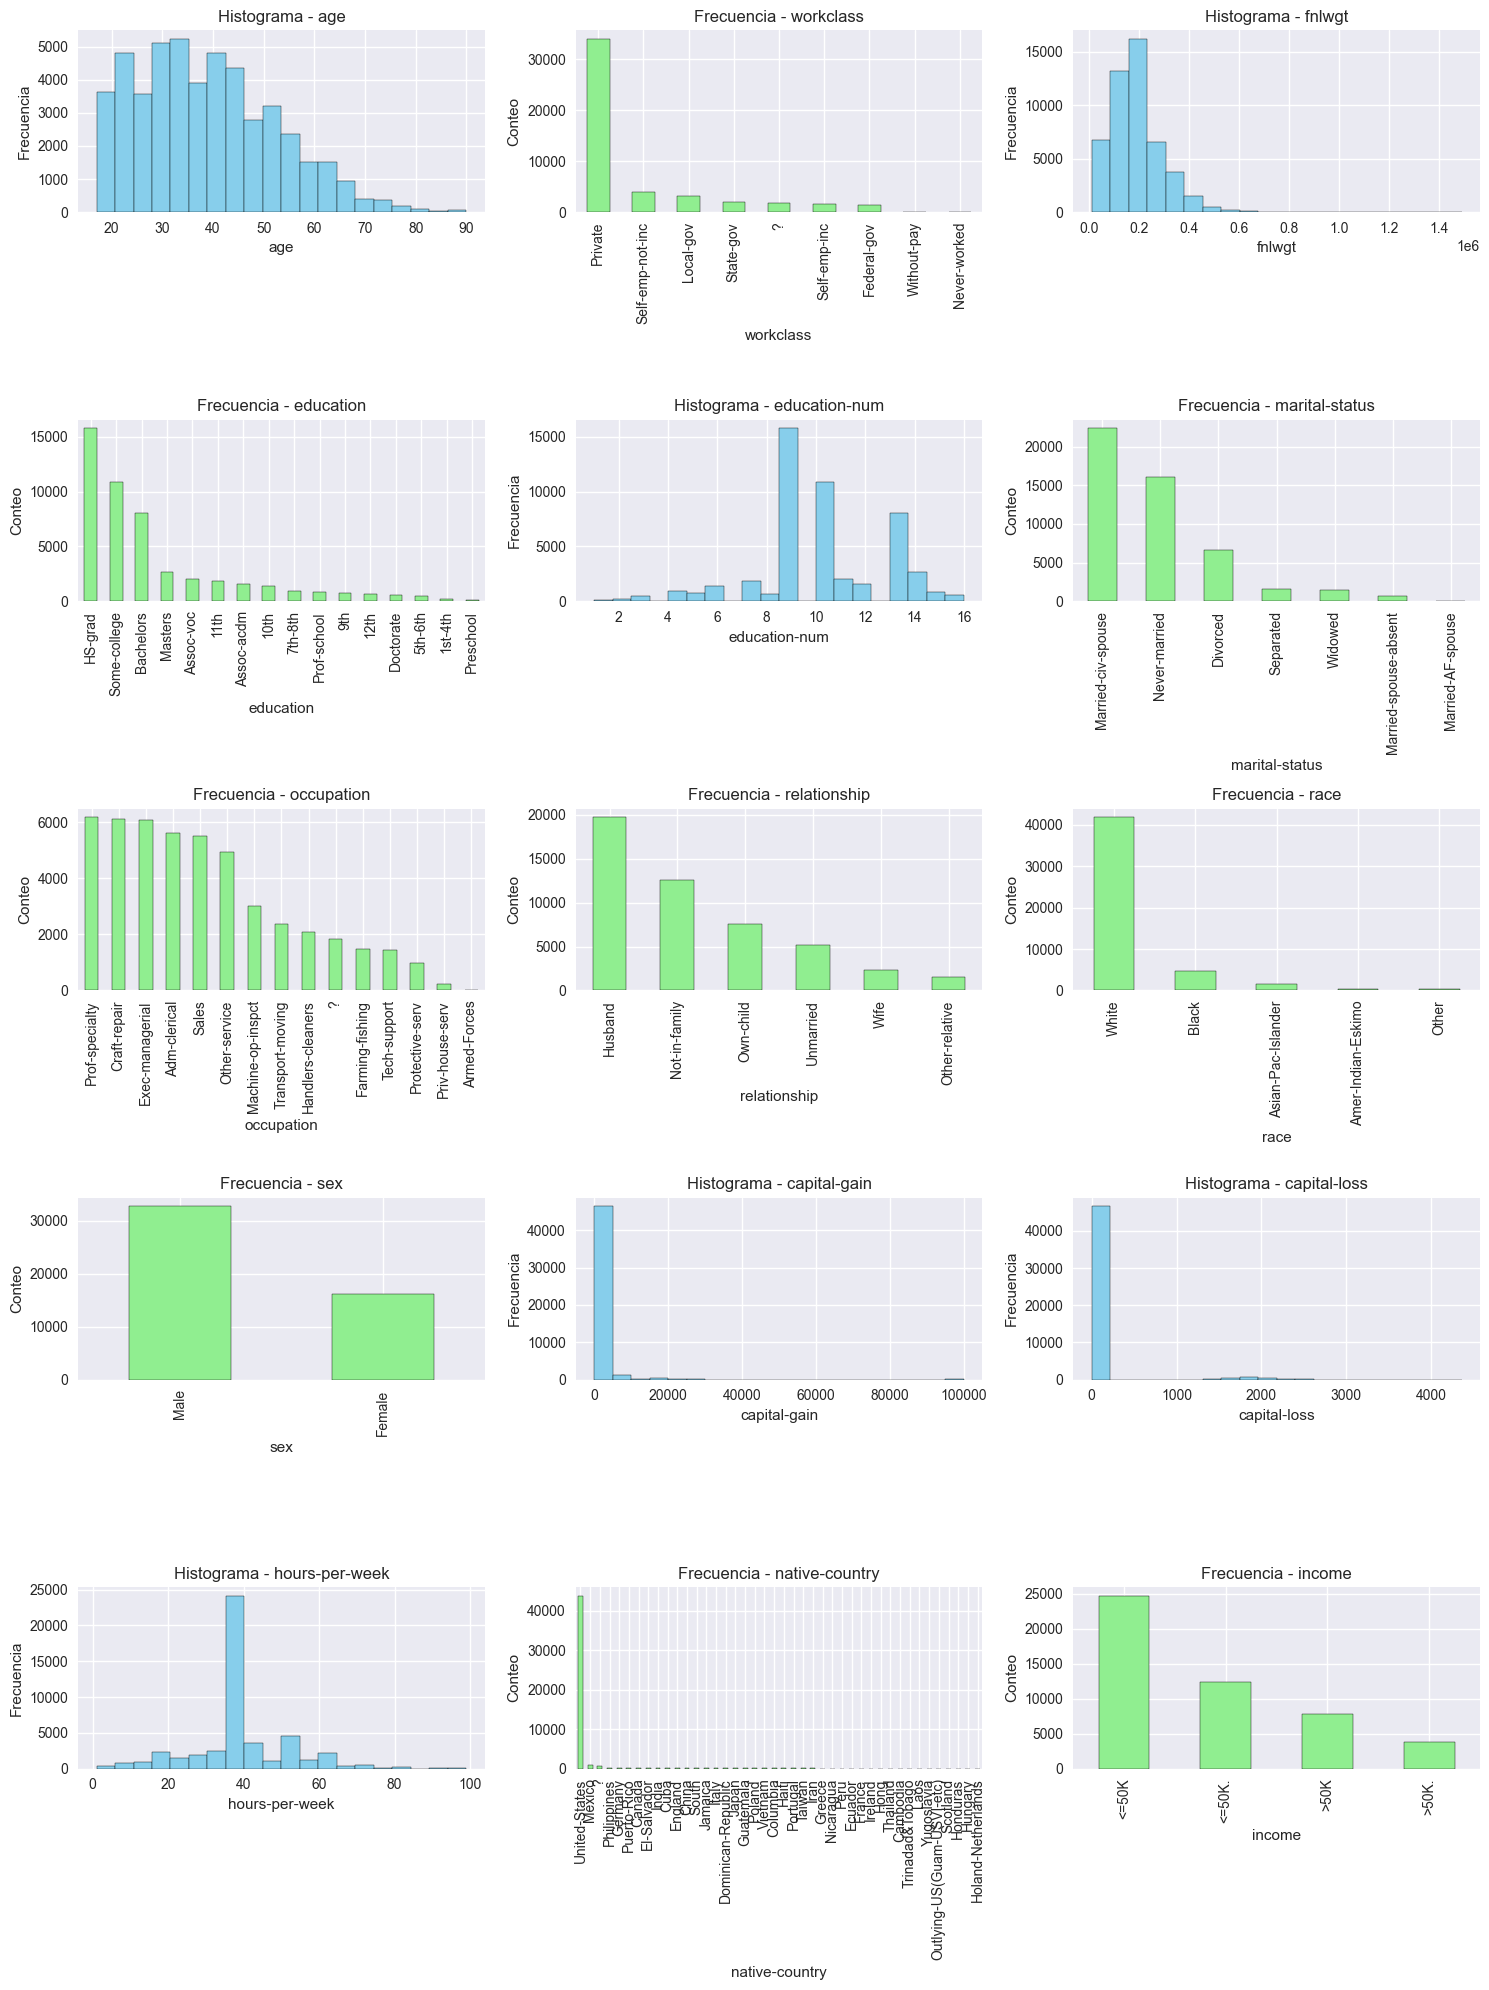

In [315]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 20))


for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 3, i) 
    
    if df[col].dtype in ['int64', 'float64']:  # numéricas
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histograma - {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
    
    else:  # categóricas
        df[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
        plt.title(f'Frecuencia - {col}')
        plt.xlabel(col)
        plt.ylabel('Conteo')

plt.tight_layout()
plt.show()

## Limpieza de Datos

### Valores Duplicados

In [316]:
duplicados = df.duplicated().sum()
print(f"Número de duplicados: {duplicados}")

Número de duplicados: 29


Se identificaron 29 registros duplicados que podrían sesgar el análisis y el entrenamiento del modelo. Esto representa aproximadamente 0.06% del dataset, un porcentaje bajo pero que debe ser manejado.

In [317]:
df.drop_duplicates(inplace=True)

In [318]:
duplicados = df.duplicated().sum()
print(f"Número de duplicados: {duplicados}")

Número de duplicados: 0


Se confirma que la eliminación de duplicados fue exitosa antes de continuar con el análisis.

### Valores Nulos

In [319]:
print(df.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [320]:
for col in df.columns:
    print(f"\n Columna: {col}")
    print(df[col].unique())


 Columna: age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

 Columna: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

 Columna: fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]

 Columna: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

 Columna: education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 Columna: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

 Columna: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Trans

In [321]:
columnas_a_cambiar = ['workclass', 'occupation', 'native-country']

for col in columnas_a_cambiar:
    df[col] = df[col].replace('?', 'Non-specific')
    df[col] = df[col].fillna('Non-specific')

Se identificaron las columnas con datos faltantes, fueron: 'workclass', 'occupation', 'native-country'.

- workclass: 963 valores nulos (≈2%)
- occupation: 966 valores nulos (≈2%)
- native-country: 274 valores nulos (≈0.6%)

Los datos nulos se etiquetaron como 'Non-specific', adicionalmente se manejo el valor '?' como un símil de valor nulo.

### Valores Transformados

Se planea consolidar categorías similares para reducir la dimensionalidad y mejorar la interpretabilidad del modelo.

In [322]:
def plot_comparison(df, column, old_values, new_values, title="Comparison", figsize=(12, 5)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    old_values.plot(kind='bar', ax=ax1, color='lightcoral')
    ax1.set_title(f'{title} - Before')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)

    new_values.plot(kind='bar', ax=ax2, color='lightblue')
    ax2.set_title(f'{title} - After')
    ax2.set_ylabel('Count')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.suptitle(f'{title}: {column}', fontsize=16)
    plt.tight_layout()
    plt.show()

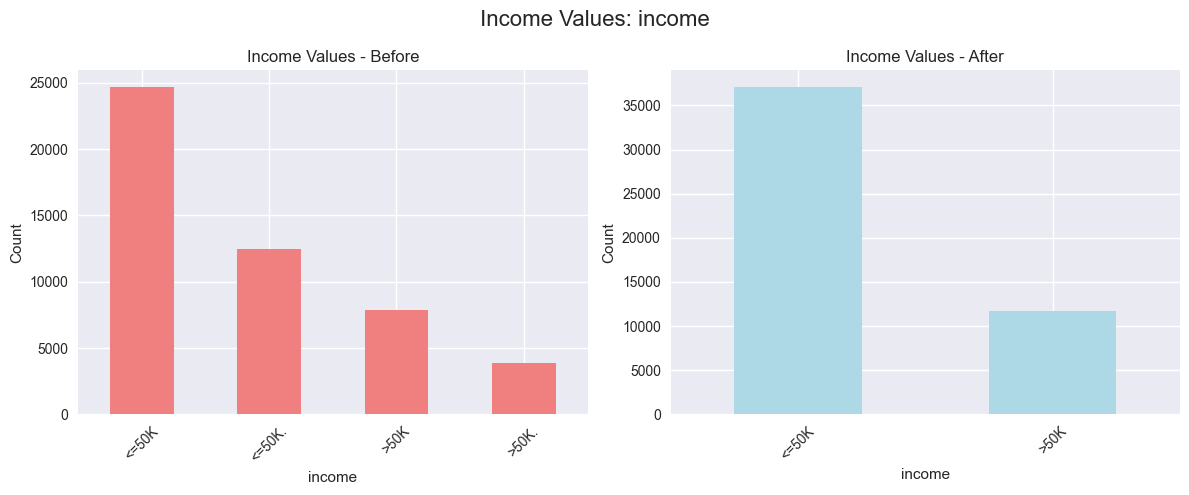

In [323]:
old_values = df['income'].value_counts()
df['income'] = df['income'].replace(['<=50K.', '>50K.'], ['<=50K', '>50K'])
new_values = df['income'].value_counts()

plot_comparison(df, 'income', old_values, new_values, "Income Values")

- Eliminación de caracteres inconsistentes que podrían causar problemas en la codificación.
- Se prioriza la consistencia en la variable objetivo para evitar errores en el entrenamiento del modelo.

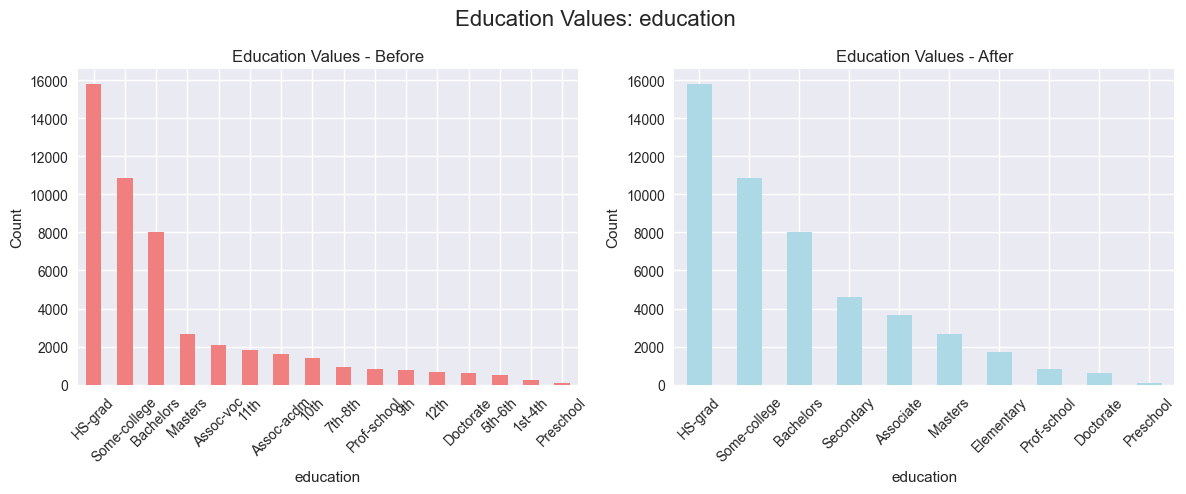

In [324]:
old_values = df['education'].value_counts()
df['education'] = df['education'].replace(['9th', '10th', '11th', '12th'], 'Secondary')
df['education'] = df['education'].replace(['1st-4th', '5th-6th', '7th-8th'], 'Elementary')
df['education'] = df['education'].replace(['Assoc-voc', 'Assoc-acdm'], 'Associate')
new_values = df['education'].value_counts()

plot_comparison(df, 'education', old_values, new_values, "Education Values")

- Habían 16 niveles individuales desde 'Preschool' hasta 'Doctorate'.
- Agrupación de niveles similares (10 niveles) para reducir ruido y mejorar generalización.
- Esto para tener una variable categórica más manejable y menos propensa a overfitting.

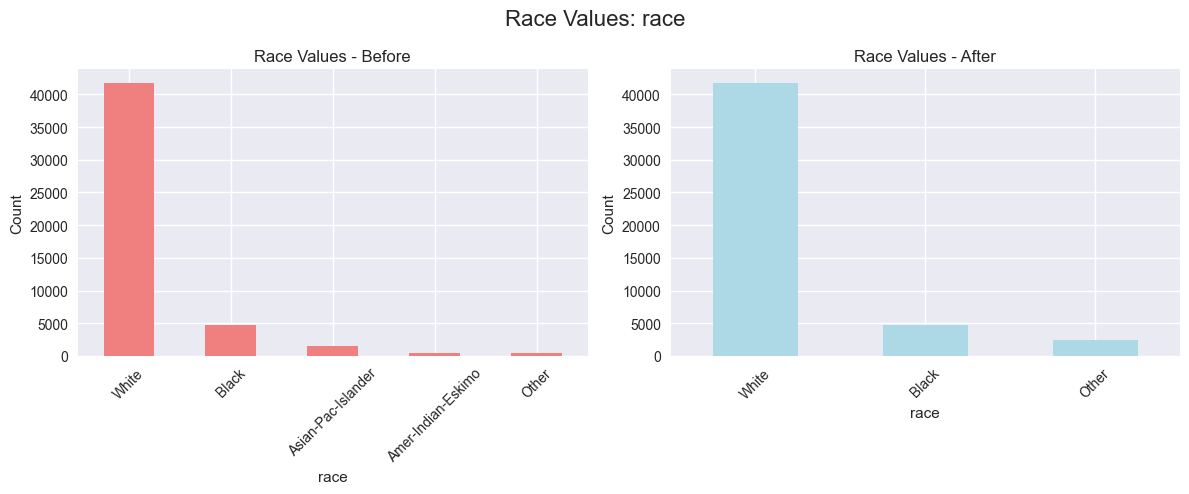

In [325]:
old_values = df['race'].value_counts()
df['race'] = df['race'].replace(['Amer-Indian-Eskimo', 'Asian-Pac-Islander'], 'Other')
new_values = df['race'].value_counts()

plot_comparison(df, 'race', old_values, new_values, "Race Values")

- Se tenían 5 categorías de raza, donde 2 son demasiado específicas como para representar un grupo importante.
- Agrupación de categorías con muy pocas muestras para evitar overfitting.
- De 5 a 3 categorías, manteniendo las distinciones raciales más relevantes.

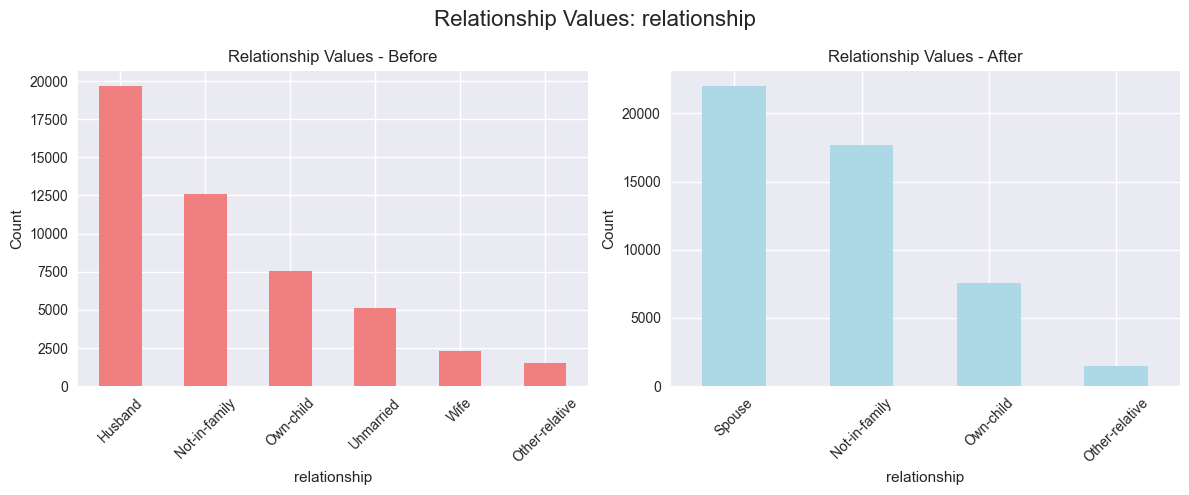

In [326]:
old_values = df['relationship'].value_counts()
df['relationship'] = df['relationship'].replace(['Husband', 'Wife'], 'Spouse')
df['relationship'] = df['relationship'].replace('Unmarried', 'Not-in-family')
new_values = df['relationship'].value_counts()

plot_comparison(df, 'relationship', old_values, new_values, "Relationship Values")

- Agrupación de 'Husband' y 'Wife' en 'Spouse' para reducir dimensionalidad.
- De 6 a 4 categorías, manteniendo la información semántica relevante, ya que el caso unificado solo era una distinción de sexo.

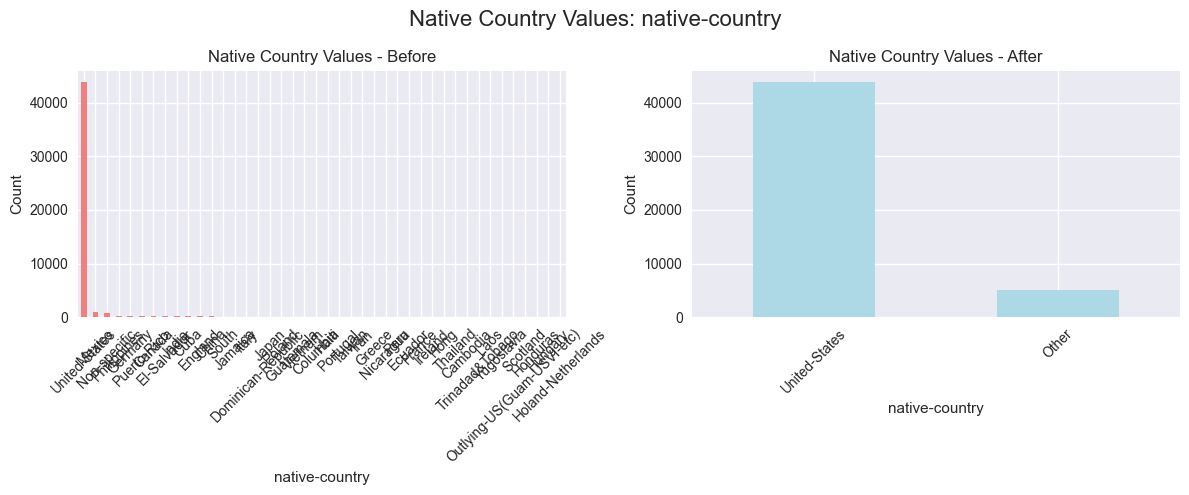

In [327]:
old_values = df['native-country'].value_counts()
df['native-country'] = df['native-country'].apply(lambda x: 'Other' if x != 'United-States' else x)
new_values = df['native-country'].value_counts()

plot_comparison(df, 'native-country', old_values, new_values, "Native Country Values")

- 42 valores únicos que crearán muchas columnas dummy después del One-Hot Encoding.
- Hay un desbalance severo porque 'United-States' probablemente representa >80% de los datos.
- Se tiene poca variabilidad predictiva, pues la mayoría de países tendrán muy pocas muestras.
- Agrupación de países distintos a 'United States'.

### Resumen de transformaciones

- Income: Se estandarizaron los valores de '<=50K.' y '>50K.' eliminando puntos
- Education: Se agruparon niveles educativos similares:
    - 'Elementary' (1st-4th, 5th-6th, 7th-8th)
    - 'Secondary' (9th, 10th, 11th, 12th)
    - 'Associate' (Assoc-voc, Assoc-acdm)
- Race: Se consolidaron 'Amer-Indian-Eskimo' y 'Asian-Pac-Islander' en 'Other'
- Relationship: Se simplificó 'Husband' y 'Wife' a 'Spouse'
- Native Country: Cualquier pais distinto a 'United States' se agrupa como 'Other'

## Análisis de variables

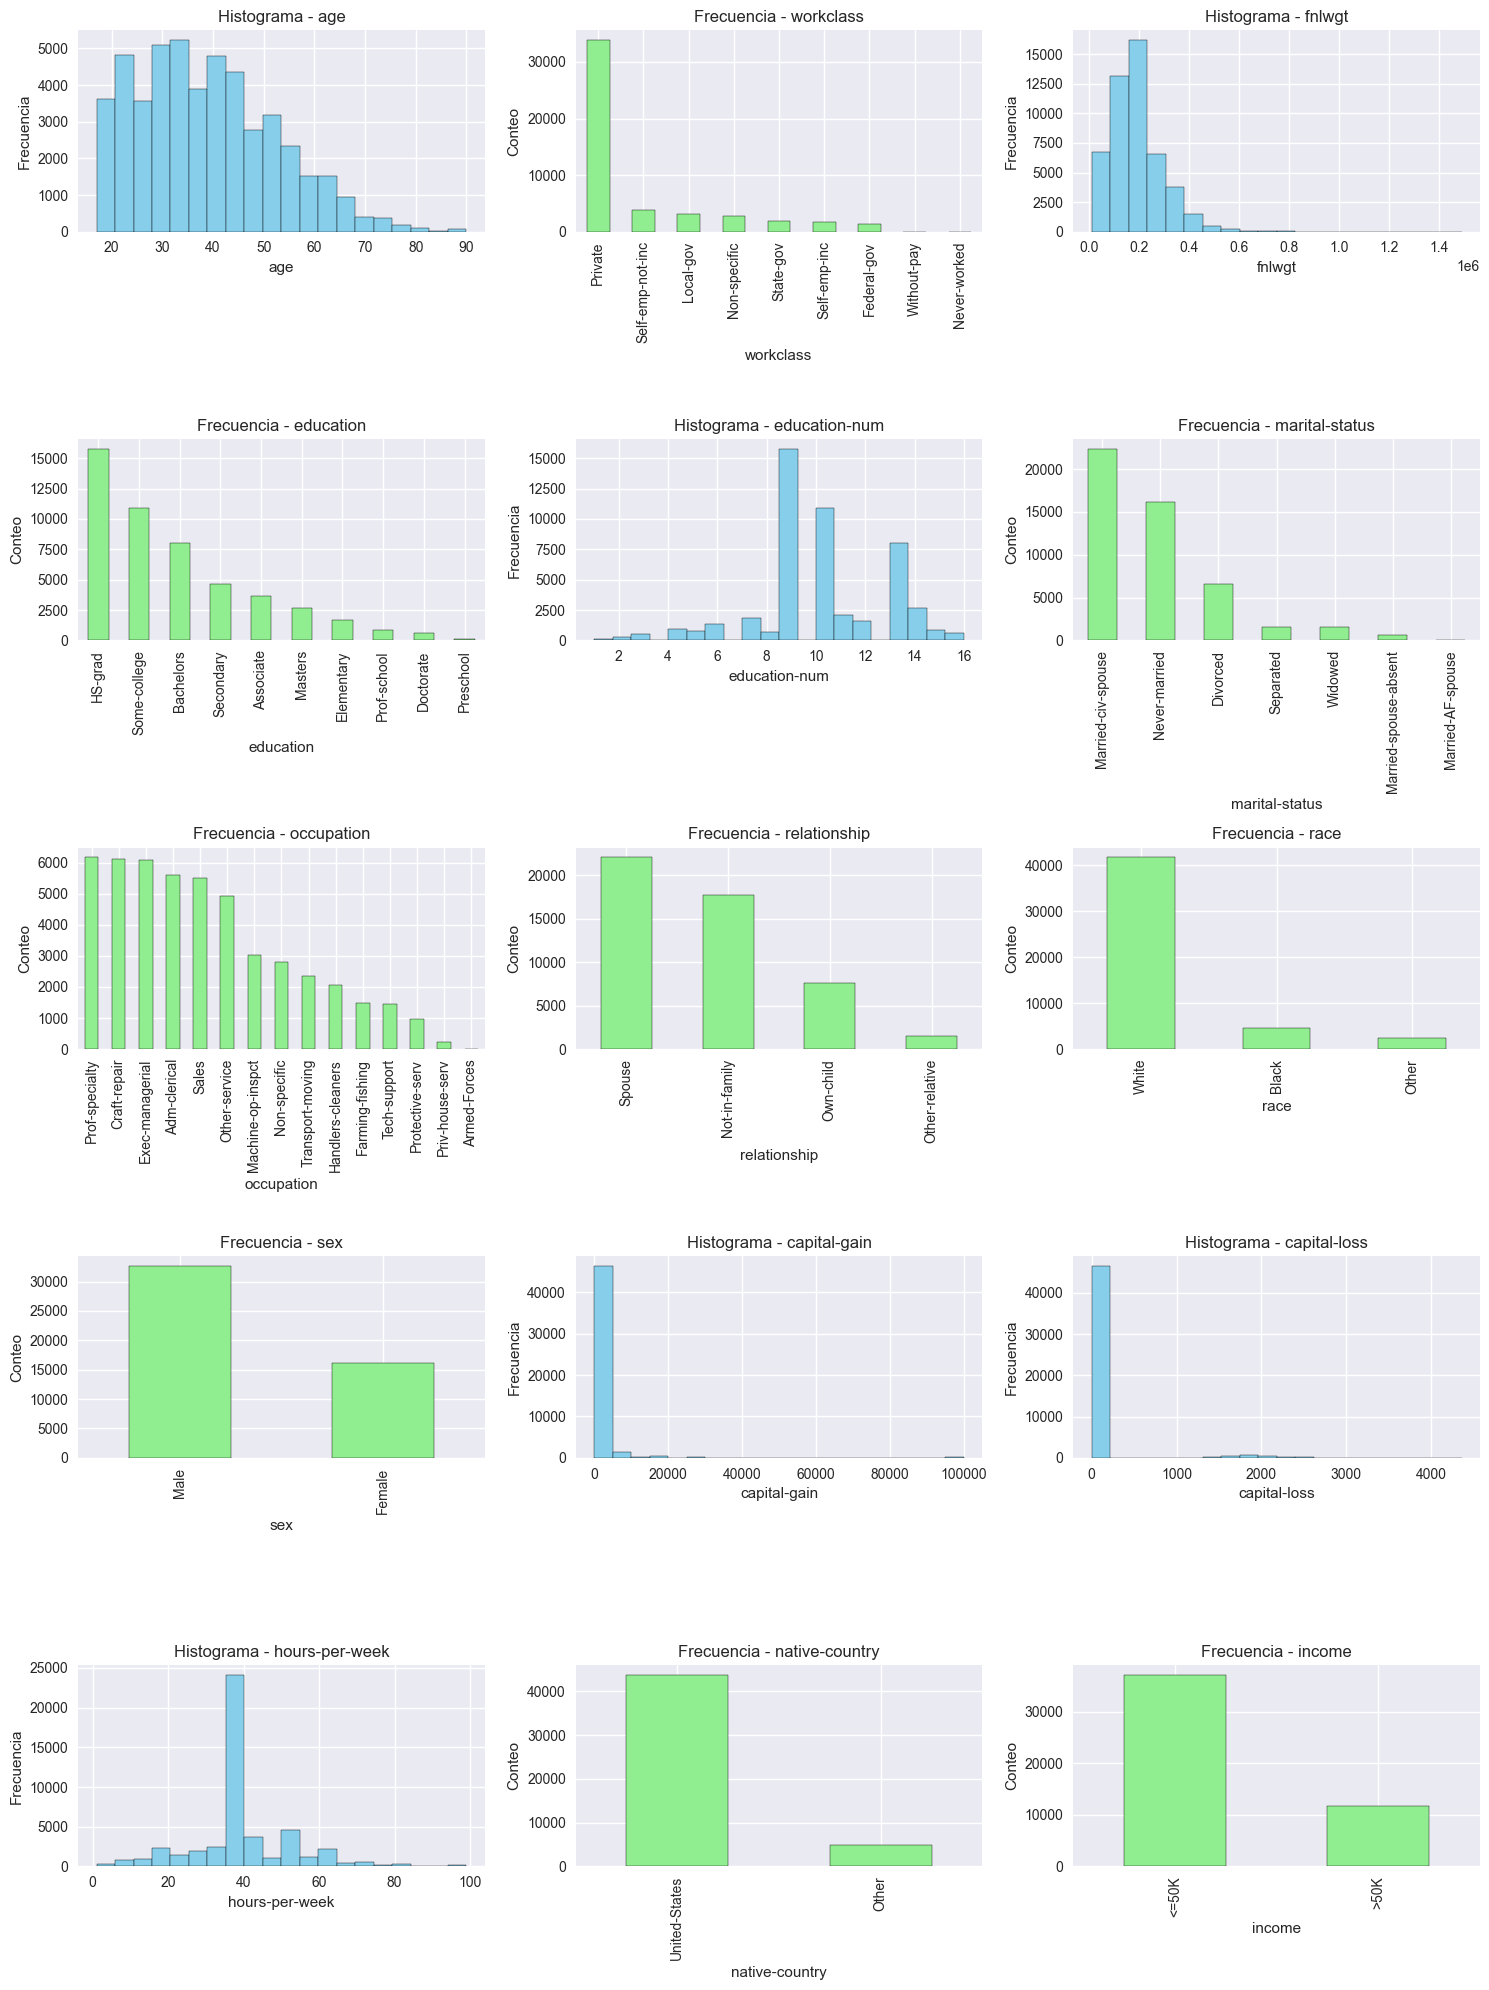

In [328]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 20))


for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 3, i) 
    
    if df[col].dtype in ['int64', 'float64']:
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histograma - {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
    
    else:  # categóricas
        df[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
        plt.title(f'Frecuencia - {col}')
        plt.xlabel(col)
        plt.ylabel('Conteo')

plt.tight_layout()
plt.show()


### Variables a Omitir

1. fnlwgt

    - 28,523 valores únicos en un dataset de aprox 48,000 registros, este es un peso de muestreo del censo, no una característica predictiva real.
    - Representa la frecuencia de observación en la población, no información sobre el individuo.

2. education

    - Redundancia perfecta con education-num, ya que education-num es la versión numérica ordinal (1-16) que es más útil para el modelo.
    - Las variables categóricas duplicadas aumentan la dimensionalidad sin aportar información adicional.

In [329]:
df = df.drop(columns=['fnlwgt', 'education'])

In [330]:
for col in df.columns:
    print(f"\n Columna: {col}")
    print(df[col].unique())


 Columna: age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

 Columna: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Non-specific' 'Self-emp-inc' 'Without-pay' 'Never-worked']

 Columna: education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 Columna: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

 Columna: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Non-specific'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

 Columna: relationship
['Not-in-family' 'Spouse' 'Own-child' 'Other-relative']

 Columna: race
['White' 'Black' 'Ot

## Preprocesamiento

In [333]:
numeric_features = ["age", "education-num", "hours-per-week"]
skewed_features = ["capital-gain", "capital-loss"]
categorical_features = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

In [334]:
target = "income"
df[target] = df[target].map({"<=50K": 0, ">50K": 1})

Dado que la variable objetivo 'income' es binaria, simplemente se mapea como 0 y 1, para los valores "<=50K" y ">50K", respectivamente.

In [335]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

log_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(func=np.log1p, validate=False)),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

Pipeline numeric_transformer:
1. Se rellenan valores faltantes con la mediana de la columna (protocolo).
2. Se estandarizan los datos.

Pipeline log_transformer:
1. Se rellenan valores faltantes con la mediana (protocolo).
2. Se aplica el logaritmo natural + 1 a los datos.
3. Se estandariza después de la transformación log.

Pipeline categorical_transformer:
1. Se rellenan valores faltantes con la moda (protocolo).
2. Se convierten las categorías en columnas dummy, por robustez.

In [336]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("log_num", log_transformer, skewed_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

Se conectan los 3 pipelines creados, aplicando cada uno a sus variables correspondientes.

In [ ]:
X = df.drop(columns=[target])
y = df[target]

In [ ]:
X_processed = preprocessor.fit_transform(X)

In [ ]:
ohe_cols = preprocessor.named_transformers_["cat"]["onehot"].get_feature_names_out(categorical_features)

In [ ]:
processed_df = pd.DataFrame(
    np.hstack([X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed]),
    columns=(
        numeric_features +
        skewed_features +
        list(ohe_cols)
    )
)

In [338]:
processed_df[target] = y.values

Constrcción del dataframe final, con las variables transformadas y la variable objetivo.

In [339]:
processed_df

,age,education-num,hours-per-week,capital-gain,capital-loss,workclass_Local-gov,workclass_Never-worked,workclass_Non-specific,workclass_Private,workclass_Self-emp-inc,...,occupation_Tech-support,occupation_Transport-moving,relationship_Other-relative,relationship_Own-child,relationship_Spouse,race_Other,race_White,sex_Male,native-country_United-States,income
0,0.025724,1.136595,-0.034304,2.843612,-0.221333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
1,0.828125,1.136595,-2.213335,-0.298014,-0.221333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0
2,-0.047221,-0.419685,-0.034304,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
3,1.046961,-1.197826,-0.034304,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0
4,-0.776676,1.136595,-0.034304,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48808,0.025724,1.136595,-0.357123,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
48809,1.849362,-0.419685,-0.034304,-0.298014,-0.221333,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
48810,-0.047221,1.136595,0.772745,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0
48811,0.390452,1.136595,-0.034304,3.219591,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0


In [340]:
processed_df.to_csv('../data/processed/adult.data', index=False)